In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
trash = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')

In [3]:
trash.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


In [4]:
trash['Incident Address'].value_counts()

Incident Address
5135 Hickory Hollow Pkwy                                      21
3710 N NATCHEZ CT                                             20
12546 Old Hickory Blvd, Nashville, TN 37013, United States    19
6007 Obrien Ave, Nashville, TN 37209, United States           19
802 Crescent Rd, Nashville, TN 37205, United States           18
                                                              ..
1603 ELECTRIC AVE, 37206                                       1
2706 Oakland Ave, Nashville, TN 37212, United States           1
1612 porter ave                                                1
2466 Scott Valley Dr, Nashville, TN 37217, United States       1
604 Somerset Ct, Nashville, TN 37217, United States            1
Name: count, Length: 14121, dtype: int64

In [5]:
trash[trash['Description'].str.contains("Missed", case=False, na=False)]

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
8,25330,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1794533.514,618749.3427,-86.588364,36.031728
9,25331,11/1/2017,Trash - Curbside/Alley Missed Pickup,"Trash missed Tuesday again, ALLEY",1206 Ireland St,37208.0,METRO,9208,19.0,1733029.474,668762.6409,-86.797745,36.167916
10,25341,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 HYDES FERRY RD,37218.0,RED RIVER,4204,2.0,1721577.768,676018.3999,-86.836750,36.187584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,267121,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed,"2709 Crestdale Dr, Nashville, TN 37214, United...",37214.0,RED RIVER,1502,15.0,1770240.199,676334.3993,-86.671860,36.189483
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [33]:
trash['Trash Hauler'] = trash['Trash Hauler'].str.lower()  ##make values all lower case

In [50]:
missed=trash[trash['Description'].str.contains("Missed", case=False, na=False)]

In [51]:
missed_counts=missed['Incident Address'].value_counts()

In [52]:
missed_counts[missed_counts > 1]

Incident Address
5135 Hickory Hollow Pkwy                                      21
6007 Obrien Ave, Nashville, TN 37209, United States           19
3710 N NATCHEZ CT                                             17
12546 Old Hickory Blvd, Nashville, TN 37013, United States    16
802 Crescent Rd, Nashville, TN 37205, United States           16
                                                              ..
900 Noel Green Ct, Nashville, TN 37204, United States          2
3257 Panorama Dr                                               2
1021 sharpe ave                                                2
3616 hoods hill rd                                             2
3400 Lanawood Ct, Nashville, TN 37217, United States           2
Name: count, Length: 1625, dtype: int64

In [53]:
missed_multiple = missed_counts[missed_counts >1]

In [54]:
fines = (missed_multiple - 1) * 200

In [39]:
print(fines)

Incident Address
5135 Hickory Hollow Pkwy                                      4000
6007 Obrien Ave, Nashville, TN 37209, United States           3600
3710 N NATCHEZ CT                                             3200
802 Crescent Rd, Nashville, TN 37205, United States           3200
12546 Old Hickory Blvd, Nashville, TN 37013, United States    3000
                                                              ... 
1016 MONTROSE AVE                                              200
2761 watersview dr                                             200
409 McIver St B                                                200
610 brook hollow rd                                            200
823 Knox Ave                                                   200
Name: count, Length: 2033, dtype: int64


In [55]:
trash['Request'].value_counts()

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [56]:
fines.sum()

562400

In [14]:
fines.reset_index()

,Incident Address,count
0,5135 Hickory Hollow Pkwy,4000
1,"6007 Obrien Ave, Nashville, TN 37209, United S...",3600
2,3710 N NATCHEZ CT,3200
3,"802 Crescent Rd, Nashville, TN 37205, United S...",3200
4,"12546 Old Hickory Blvd, Nashville, TN 37013, U...",3000
...,...,...
2028,1016 MONTROSE AVE,200
2029,2761 watersview dr,200
2030,409 McIver St B,200
2031,610 brook hollow rd,200


In [15]:
merged = pd.merge(trash, fines, on="Incident Address", how="left")

In [16]:
trash[trash['Request'] == "Trash Collection Complaint"]

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
5,25317,11/1/2017,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211.0,RED RIVER,4304,16.0,1751660.164,643215.2011,-86.733980,36.098140
7,25327,11/1/2017,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1731459.367,666013.6012,-86.802988,36.160330
11,25350,11/1/2017,Trash Collection Complaint,Missed- 4th week in a row.,3210 Whites Creek Pike,37207.0,RED RIVER,3201,3.0,1726432.966,691919.2003,-86.820750,36.231374
13,25366,11/1/2017,Trash Collection Complaint,trash truck took cart \r\n3 guys on truck did ...,2200 osage st,37208.0,METRO,9201,21.0,1728644.757,672074.0991,-86.812692,36.176913
16,25393,11/1/2017,Trash Collection Complaint,trash carts all tossed in road after pick up,2720 riverbend dr,37214.0,RED RIVER,1501,15.0,1762455.924,693225.6657,-86.698647,36.235731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20183,266732,11/1/2019,Trash Collection Complaint,Caller stated her trash misses her trash all t...,"2114 Vine Hill Rd, Nashville, TN 37204, United...",37204.0,METRO,9406,17.0,1741197.382,655129.2365,-86.769711,36.130646
20197,266844,11/1/2019,Trash Collection Complaint,RESIDENT CAME HOME YESTERDAY TO FIND THAT THE ...,"2812 Vaulx Ln, Nashville, Tennessee, 37204",37204.0,METRO,9404,17.0,1738157.855,652143.5792,-86.779923,36.122379
20200,266891,11/1/2019,Trash Collection Complaint,"garbage truck is cutting the corner too close,...","1997 Nashboro Blvd, Nashville, Tennessee, 37217",37217.0,RED RIVER,2505,29.0,1781292.396,639805.4380,-86.633606,36.089342
20211,267014,11/1/2019,Trash Collection Complaint,MANAGER SAYS HE WITNESSED THE TRASH TRUCK COME...,"109 2nd Ave N, Nashville, TN 37201, United States",37201.0,NaN,NaN,19.0,1739543.400,666600.8010,-86.775620,36.162122


In [41]:
trash_company=trash['Trash Hauler']
print(trash_company)

0        red river
1        red river
2        red river
3        waste ind
4        red river
           ...    
20221    red river
20222        metro
20223    red river
20224    red river
20225    red river
Name: Trash Hauler, Length: 20226, dtype: object


In [42]:
##trash["Trash Hauler"]=trash["Trash Hauler"].replace({"METRO": "Metro"})

In [43]:
## missed pickups by route 
missed_by_route=missed.groupby("Trash Route").size().reset_index(name="total_missed_by_route")
missed_by_route

,Trash Route,total_missed_by_route
0,1201,131
1,1202,70
2,1202S,2
3,1203,50
4,1204,46
...,...,...
167,9504,29
168,9505,37
169,9506,48
170,9507,54


In [44]:
missed.groupby("Trash Route").size().reset_index(name="total_missed_by_route").sort_values("total_missed_by_route", ascending=False)

,Trash Route,total_missed_by_route
133,4504,258
74,3302,220
9,1303,200
124,4404,197
62,3201,187
...,...,...
134,4504S,2
22,1502S,1
105,4201S,1
52,2405S,1


In [45]:
## each trash hauler missed trash count
missed_by_hauler=missed.groupby("Trash Hauler").size().reset_index(name="total_missed_pickups")
(missed_by_hauler)

,Trash Hauler,total_missed_pickups
0,metro,2140
1,red river,9586
2,waste ind,791


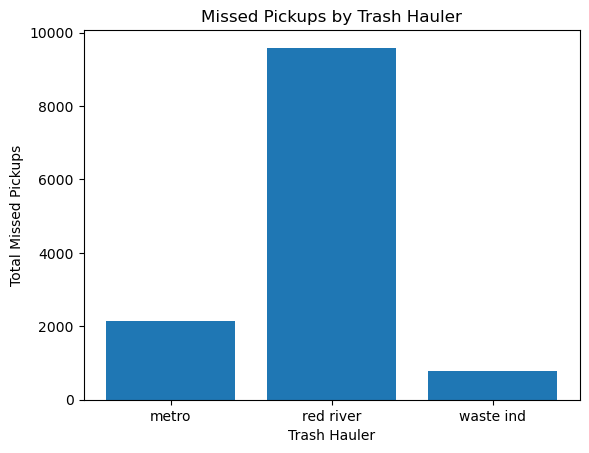

In [46]:
plt.bar(missed_by_hauler["Trash Hauler"], missed_by_hauler["total_missed_pickups"])
plt.xlabel("Trash Hauler")
plt.ylabel("Total Missed Pickups")
plt.title("Missed Pickups by Trash Hauler")
plt.show()

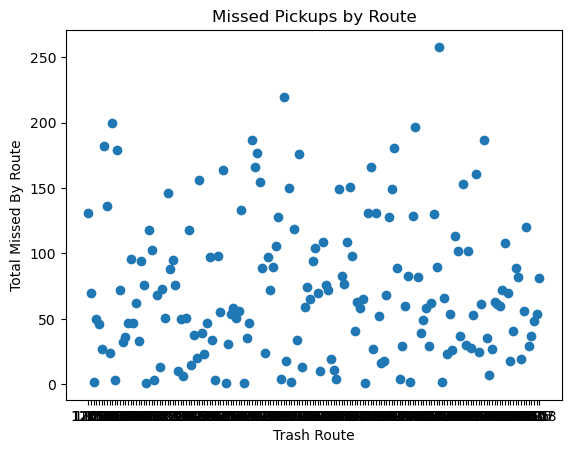

In [47]:
plt.scatter(missed_by_route["Trash Route"], missed_by_route["total_missed_by_route"])
plt.xlabel("Trash Route")
plt.ylabel("Total Missed By Route")
plt.title("Missed Pickups by Route")
plt.show()

In [32]:
merged.groupby("Trash Hauler")["count"].sum().sort_values(ascending= False)

Trash Hauler
RED RIVER    2630000.0
METRO         501400.0
WASTE IND     132800.0
Metro           5200.0
Name: count, dtype: float64

In [25]:
w_map = folium.Map(location=[merged['LATITUDE'].mean(), merged['LONGITUDE'].mean()], zoom_start=12)

In [26]:
waste= merged[merged['Trash Hauler']== 'WASTE IND']

In [27]:
##trash["Trash Hauler"]=trash["Trash Hauler"].replace({"METRO": "Metro"})


In [28]:
trash.isna().sum()

Request Number        0
Date Opened           0
Request               0
Description          31
Incident Address      9
Zip Code             75
Trash Hauler        901
Trash Route         947
Council District     49
State Plan X         28
State Plan Y         28
LONGITUDE            28
LATITUDE             28
dtype: int64

In [30]:
trash['Request'].value_counts()

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [31]:
trash['Trash Hauler'] = trash['Trash Hauler'].str.lower()

In [ ]:
df[df['Trash Hauler']=='Red River']